In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from urllib.request import urlretrieve
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'iters-per-timestep': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[8],
                    'nussult-number-nshadow': values[6],
                    'nusult-number': values[7],
                    'flux-combined': values[9],
                    'heat-storage-rate-flux': values[10],
                    'htf-avg-temp': values[11]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'base1.out'  # Replace with your text file path
output_file_path = 'simulation_report_base1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file2= pd.read_csv('simulation_report_base1.csv')

print(f"Data has been written to {output_file_path}")
my_file2
      


Data has been written to simulation_report_base1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""area-q""","""pcm-avg-temp""","""iters-per-timestep""","""nusult-number""","""heat-storage-rate""","""nussult-number-nshadow""","""temp-uniformity-index""","""flux-combined""","""heat-storage-rate-flux"""
1,0,0,0,300,10,0,0,0,0,0,0,300.0000000000001
2,1,0.1,0,300.0014559368333,47,1532.475527184208,0.000192557212282165,44.90921989356358,22.45460994678179,-0.001866644311419918,30.75629740324894,302.3752004477129
3,2,0.2,0,300.0054672777745,47,2776.026867864234,0.001106577861081909,78.52314340921797,39.26157170460898,0.002626908793885718,57.71688331693058,304.6772487371032
4,3,0.3,0,300.0095721494073,47,3588.158210672301,0.002280496728285385,98.73620806979491,49.36810403489745,-0.004953730458453265,76.02305242904269,306.1787877455009
...,...,...,...,...,...,...,...,...,...,...,...,...
26326,26325,2632.5,1,352.4955101868293,1,0.03531037054872611,0.4607384264631477,-1607.067953835333,-803.5339769176665,1.372173392744092e-06,0.2082543483741474,352.9936810901014
26327,26326,2632.6,1,352.4956520999597,1,0.03513408050901659,0.4606620813049478,-1607.072718911713,-803.5363594558564,-2.330405676209679e-06,0.2081763492377479,352.9936832298428
26328,26327,2632.7,1,352.4957939623754,1,0.03531907158606875,0.4605857454817088,-1607.130050983656,-803.5650254918281,1.312591431074095e-06,0.2081068732844476,352.9936854071997
26329,26328,2632.8,1,352.4959357741337,1,0.03521415961016775,0.4605094191244711,-1607.128558803515,-803.5642794017574,-2.17234581881276e-06,0.2080302917968028,352.9936875396892


In [3]:

my_file2= my_file2.iloc[1:].reset_index(drop=True)

my_file2['flow-time']= my_file2['flow-time'].astype(float)
my_file2['area-q']= my_file2['area-q'].astype(float)

my_file2['Time Step']= my_file2['Time Step'].astype(float)
my_file2['pcm-avg-temp']= my_file2['pcm-avg-temp'].astype(float)
my_file2['heat-storage-rate']= my_file2['heat-storage-rate'].astype(float)
my_file2['temp-uniformity-index']= my_file2['temp-uniformity-index'].astype(float)
my_file2['nussult-number-nshadow']= my_file2['nussult-number-nshadow'].astype(float)
my_file2['nusult-number']= my_file2['nusult-number'].astype(float)
my_file2['flux-combined']= my_file2['flux-combined'].astype(float)
my_file2['heat-storage-rate-flux']= my_file2['heat-storage-rate-flux'].astype(float)
my_file2['htf-avg-temp']= my_file2['htf-avg-temp'].astype(float)
my_file2= my_file2[my_file2['area-q'] < 1]
my_file2['heat-storage-rate-avg']= my_file2['heat-storage-rate-flux'].cumsum()/my_file2['Time Step']
my_file2['temp-diff'] = my_file2['htf-avg-temp'] - my_file2['pcm-avg-temp']
my_file2['mean temp diff'] =my_file2['temp-diff'].cumsum()/my_file2['Time Step']

my_file2

,Time Step,flow-time,area-q,pcm-avg-temp,iters-per-timestep,heat-storage-rate,temp-uniformity-index,nussult-number-nshadow,nusult-number,flux-combined,heat-storage-rate-flux,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.0,300.000000,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,1.136868e-13,inf
1,1.0,0.1,0.0,300.001456,47,1532.475527,0.000193,44.909220,22.454610,-0.001867,30.756297,302.375200,30.756297,2.373745e+00,2.373745
2,2.0,0.2,0.0,300.005467,47,2776.026868,0.001107,78.523143,39.261572,0.002627,57.716883,304.677249,44.236590,4.671781e+00,3.522763
3,3.0,0.3,0.0,300.009572,47,3588.158211,0.002280,98.736208,49.368104,-0.004954,76.023052,306.178788,54.832078,6.169216e+00,4.404914
4,4.0,0.4,0.0,300.017278,47,4591.045101,0.005051,120.716283,60.358141,0.004081,99.658314,308.138069,66.038637,8.120792e+00,5.333883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23399,23399.0,2339.9,1.0,351.710701,1,0.128040,0.673578,-1458.717464,-729.358732,0.000005,0.684538,352.980405,8.164672,1.269704e+00,12.727431
23400,23400.0,2340.0,1.0,351.711166,1,0.127016,0.673510,-1458.785342,-729.392671,-0.000007,0.684242,352.980412,8.164353,1.269246e+00,12.726942
23401,23401.0,2340.1,1.0,351.711631,1,0.127880,0.673441,-1458.873835,-729.436918,0.000006,0.683985,352.980420,8.164033,1.268789e+00,12.726452
23402,23402.0,2340.2,1.0,351.712096,1,0.126719,0.673372,-1458.944834,-729.472417,-0.000008,0.683687,352.980428,8.163713,1.268331e+00,12.725962


In [4]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = 'c2.out'  # Replace with your text file path
output_file_path = 'simulation_report_c1.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file4= pd.read_csv('simulation_report_c1.csv')

print(f"Data has been written to {output_file_path}")
my_file4
      


Data has been written to simulation_report_c1.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999998,0,0,0,0,299.9999999999996
2,1,0.1,0,300.0009070399414,-21.81102803683363,0.009566152621013025,15.64115828084126,0.000109408207613626,302.4535409927312
3,2,0.2,0,300.0035437109772,-40.95883680137728,0.03400390244844909,3.207454984163868,-0.00025346043148744,304.8574728852691
4,3,0.3,0,300.0063400356426,-55.48698053782268,0.05773532780464687,3.31382823708508,-2.917130220936315e-05,306.435229977335
...,...,...,...,...,...,...,...,...,...
36222,36221,3622.1,1,352.9653833114463,-0.01145402487477436,0.04218510753003531,3.439021727077945,7.267421381698669e-09,352.9996395549324
36223,36222,3622.2,1,352.965391054523,-0.01145137143726032,0.04217687664564186,3.439122126870641,7.353562543610526e-09,352.9996396367257
36224,36223,3622.3,1,352.9653987958116,-0.01144871484518041,0.0421686462251958,3.439188926614145,7.342698560286465e-09,352.9996397185075
36225,36224,3622.4,1,352.9654065352992,-0.01144606317803224,0.04216041764959232,3.439209478870299,7.011964838626872e-09,352.999639800243


In [5]:

my_file4= my_file4.iloc[1:].reset_index(drop=True)

my_file4['flow-time']= my_file4['flow-time'].astype(float)
my_file4['area-q']= my_file4['area-q'].astype(float)
my_file4['Time Step']= my_file4['Time Step'].astype(float)

my_file4['pcm-avg-temp']= my_file4['pcm-avg-temp'].astype(float)
my_file4['heat-storage-rate']= my_file4['heat-storage-rate'].astype(float)
my_file4['temp-uniformity-index']= my_file4['temp-uniformity-index'].astype(float)
my_file4['nusult-number']= my_file4['nusult-number'].astype(float)
my_file4['flux-combined']= my_file4['flux-combined'].astype(float)
my_file4['htf-avg-temp']= my_file4['htf-avg-temp'].astype(float)
my_file4= my_file4[my_file4['area-q'] < 1]
my_file4['Temp Response'] = (my_file4['pcm-avg-temp'].shift(-1) - my_file4['pcm-avg-temp']) / 0.1
my_file4['heat-storage-rate-avg']= my_file4['heat-storage-rate'].cumsum()/my_file4['Time Step']
my_file4['temp-diff'] = my_file4['htf-avg-temp'] - my_file4['pcm-avg-temp']
my_file4['mean temp diff'] =my_file4['temp-diff'].cumsum()/my_file4['Time Step']

my_file4

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,Temp Response,heat-storage-rate-avg,temp-diff,mean temp diff
0,0.0,0.0,0.0,300.000000,0.000000,0.000000,0.000000,0.000000e+00,300.000000,0.009070,NaN,-1.705303e-13,-inf
1,1.0,0.1,0.0,300.000907,-21.811028,0.009566,15.641158,1.094082e-04,302.453541,0.026367,-21.811028,2.452634e+00,2.452634
2,2.0,0.2,0.0,300.003544,-40.958837,0.034004,3.207455,-2.534604e-04,304.857473,0.027963,-31.384932,4.853929e+00,3.653282
3,3.0,0.3,0.0,300.006340,-55.486981,0.057735,3.313828,-2.917130e-05,306.435230,0.055212,-39.418948,6.428890e+00,4.578484
4,4.0,0.4,0.0,300.011861,-78.052634,0.099791,3.435479,7.955652e-05,308.500279,0.089313,-49.077370,8.488418e+00,5.555968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22658,22658.0,2265.8,1.0,351.596395,-0.794258,0.387836,3.441085,7.177199e-07,352.978768,0.005357,-8.775040,1.382374e+00,13.276646
22659,22659.0,2265.9,1.0,351.596930,-0.793940,0.387796,3.441156,7.776135e-07,352.978776,0.005354,-8.774688,1.381846e+00,13.276121
22660,22660.0,2266.0,1.0,351.597466,-0.793625,0.387755,3.441200,7.149948e-07,352.978785,0.005352,-8.774335,1.381319e+00,13.275597
22661,22661.0,2266.1,1.0,351.598001,-0.793308,0.387714,3.441229,7.674570e-07,352.978793,0.005350,-8.773983,1.380792e+00,13.275072


In [6]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[3],
                    'pcm-avg-temp': values[4],
                    'heat-storage-rate': values[5],

                    'temp-uniformity-index': values[9],
                    'nusult-number': values[8],
                    'flux-combined': values[6],
                    'htf-avg-temp': values[7]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '2by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_2by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file10= pd.read_csv('simulation_report_2by12.csv')

print(f"Data has been written to {output_file_path}")
my_file10
      


Data has been written to simulation_report_2by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""iters-per-timestep""","""q""","""pcm-avg-temp""","""nussult-number""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,300.0000000000006,0,0,0,0,299.9999999999999
2,1,0.1,0,300.0018723842799,34.80481466272581,0.0009271676440647308,25.51621631016061,8.835459477296581e-05,303.0545901609198
3,2,0.2,0,300.0071757510246,66.59140380745139,0.003901249322196966,8.23289669167184,0.0001891534821254481,306.0187408218835
4,3,0.3,0,300.0127084411186,90.52903155239055,0.007140096363792804,8.339242356003998,5.86145505536706e-05,307.9495832963512
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8336906229524,0.05984156793121612,0.1859671999013082,8.425797040576295,-1.60766197063178e-07,352.9983371773299
29998,29997,2999.7,1,352.8337311671997,0.05982445270970509,0.185935640681098,8.425796967389152,-1.628468307979247e-07,352.9983376371791
29999,29998,2999.8,1,352.833771699834,0.05980726970403293,0.1859040860444818,8.425796894218383,-1.606601800069329e-07,352.9983380964987
30000,29999,2999.9,1,352.8338122208536,0.05979016644422698,0.1858725364243877,8.425796821063853,-1.627561402109401e-07,352.9983385560427


In [7]:

my_file10= my_file10.iloc[1:].reset_index(drop=True)

my_file10['flow-time']= my_file10['flow-time'].astype(float)
my_file10['area-q']= my_file10['area-q'].astype(float)


my_file10['pcm-avg-temp']= my_file10['pcm-avg-temp'].astype(float)
my_file10['heat-storage-rate']= my_file10['heat-storage-rate'].astype(float)
my_file10['temp-uniformity-index']= my_file10['temp-uniformity-index'].astype(float)
my_file10['nusult-number']= my_file10['nusult-number'].astype(float)
my_file10['flux-combined']= my_file10['flux-combined'].astype(float)
my_file10['htf-avg-temp']= my_file10['htf-avg-temp'].astype(float)
my_file10= my_file10[my_file10['area-q'] < 1]
my_file10['Time Step']= my_file10['Time Step'].astype(float)
my_file10['heat-storage-rate-avg']= my_file10['heat-storage-rate'].cumsum()/my_file10['Time Step']
my_file10['temp-diff'] = my_file10['htf-avg-temp'] - my_file10['pcm-avg-temp']
my_file10['mean temp diff'] =my_file10['temp-diff'].cumsum()/my_file10['Time Step']
my_file10['avg-uniformity-index'] =my_file10['temp-uniformity-index'].cumsum()/my_file10['Time Step']

my_file10

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff,avg-uniformity-index
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000e+00,300.000000,NaN,-7.389644e-13,-inf,NaN
1,1.0,0.1,0.000000e+00,300.001872,34.804815,0.000927,25.516216,8.835459e-05,303.054590,34.804815,3.052718e+00,3.052718,0.000927
2,2.0,0.2,0.000000e+00,300.007176,66.591404,0.003901,8.232897,1.891535e-04,306.018741,50.698109,6.011565e+00,4.532141,0.002414
3,3.0,0.3,0.000000e+00,300.012708,90.529032,0.007140,8.339242,5.861455e-05,307.949583,63.975083,7.936875e+00,5.667053,0.003990
4,4.0,0.4,7.887642e-09,300.023373,125.789287,0.013584,8.456478,1.189063e-04,310.457298,79.428634,1.043392e+01,6.858770,0.006388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24167,24167.0,2416.7,1.000000e+00,352.060970,0.520980,0.401900,8.426761,-3.603642e-07,352.986559,8.318435,9.255896e-01,12.315275,9.915469
24168,24168.0,2416.8,1.000000e+00,352.061322,0.520749,0.401879,8.426761,-7.458205e-07,352.986565,8.318113,9.252431e-01,12.314803,9.915075
24169,24169.0,2416.9,1.000000e+00,352.061674,0.520517,0.401859,8.426761,-3.638092e-07,352.986571,8.317790,9.248967e-01,12.314332,9.914681
24170,24170.0,2417.0,1.000000e+00,352.062026,0.520285,0.401838,8.426760,-7.461313e-07,352.986577,8.317467,9.245505e-01,12.313861,9.914288


In [8]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'heat-storage-rate': values[7],

                    'temp-uniformity-index': values[6],
                    'nusult-number': values[4],
                    'flux-combined': values[9],
                    'htf-avg-temp': values[8]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '3by11.out'  # Replace with your text file path
output_file_path = 'simulation_report_3by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file11= pd.read_csv('simulation_report_3by12.csv')

print(f"Data has been written to {output_file_path}")
my_file11
      


Data has been written to simulation_report_3by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""q""","""temp-unifprmity-index""","""nussult-number-nshadow""","""t-avg""","""htf-t-avg""","""flux"""
1,0,0,0,300,0,0,0,0,300.0000000000005
2,1,0.1,0,300.0024779443501,45.21384109528521,0.0004721911108111173,31.30088948717138,-7.519465095384703e-05,303.2541421969099
3,2,0.2,0,300.0096191535563,87.39225396984695,0.002411495204875204,55.1121436495532,0.000196616573489905,306.3915447334393
4,3,0.3,0,300.017077144066,118.4512523512508,0.004754089328630552,70.45992363226055,8.844465763502285e-05,308.4259793424345
...,...,...,...,...,...,...,...,...,...
21934,21933,2193.3,1,352.146189342926,0.4912788299244414,0.3046837241799661,-953.9082886788794,-5.875558430901151e-07,352.988474033825
21935,21934,2193.4,1,352.1465216765401,0.4910514897004692,0.3046667392767149,-953.9376747061291,3.374641555087265e-08,352.9884791994908
21936,21935,2193.5,1,352.146853855606,0.4908232597652345,0.3046497470019838,-953.9691328934457,-5.849218620013197e-07,352.9884843654222
21937,21936,2193.6,1,352.1471858801913,0.4905958419682882,0.304632747282886,-954.0006625324702,1.940525495847112e-08,352.9884895320367


In [9]:

my_file11= my_file11.iloc[1:].reset_index(drop=True)

my_file11['flow-time']= my_file11['flow-time'].astype(float)
my_file11['area-q']= my_file11['area-q'].astype(float)


my_file11['pcm-avg-temp']= my_file11['pcm-avg-temp'].astype(float)
my_file11['heat-storage-rate']= my_file11['heat-storage-rate'].astype(float)
my_file11['temp-uniformity-index']= my_file11['temp-uniformity-index'].astype(float)
my_file11['nusult-number']= my_file11['nusult-number'].astype(float)
my_file11['flux-combined']= my_file11['flux-combined'].astype(float)
my_file11['htf-avg-temp']= my_file11['htf-avg-temp'].astype(float)
my_file11= my_file11[my_file11['area-q'] < 1]
my_file11['Time Step']= my_file11['Time Step'].astype(float)
my_file11['heat-storage-rate-avg']= my_file11['heat-storage-rate'].cumsum()/my_file11['Time Step']
my_file11['temp-diff'] = my_file11['htf-avg-temp'] - my_file11['pcm-avg-temp']
my_file11['mean temp diff'] =my_file11['temp-diff'].cumsum()/my_file11['Time Step']
my_file11['avg-uniformity-index'] =my_file11['temp-uniformity-index'].cumsum()/my_file11['Time Step']

my_file11

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff,avg-uniformity-index
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000e+00,300.000000,NaN,5.115908e-13,inf,NaN
1,1.0,0.1,0.000000e+00,300.002478,45.213841,0.000472,31.300889,-7.519465e-05,303.254142,45.213841,3.251664e+00,3.251664,0.000472
2,2.0,0.2,0.000000e+00,300.009619,87.392254,0.002411,55.112144,1.966166e-04,306.391545,66.303048,6.381926e+00,4.816795,0.001442
3,3.0,0.3,0.000000e+00,300.017077,118.451252,0.004754,70.459924,8.844466e-05,308.425979,83.685782,8.408902e+00,6.014164,0.002546
4,4.0,0.4,6.482600e-08,300.031355,162.057690,0.009896,88.775092,-1.319958e-05,311.058117,103.278759,1.102676e+01,7.267313,0.004383
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21107,21107.0,2110.7,1.000000e+00,351.811893,0.716952,0.320248,-926.250765,-8.468358e-07,352.983370,9.228962,1.171477e+00,12.788004,9.647634
21108,21108.0,2110.8,1.000000e+00,351.812378,0.716638,0.320222,-926.279649,7.694826e-08,352.983377,9.228559,1.170999e+00,12.787453,9.647192
21109,21109.0,2110.9,1.000000e+00,351.812863,0.716322,0.320197,-926.309155,-8.425974e-07,352.983384,9.228156,1.170522e+00,12.786903,9.646750
21110,21110.0,2111.0,1.000000e+00,351.813347,0.716008,0.320171,-926.356067,8.360009e-08,352.983392,9.227753,1.170044e+00,12.786353,9.646308


In [10]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[2],
                    'pcm-avg-temp': values[3],
                    'heat-storage-rate': values[4],

                    'temp-uniformity-index': values[8],
                    'nusult-number': values[7],
                    'flux-combined': values[5],
                    'htf-avg-temp': values[6]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '3by51.out'  # Replace with your text file path
output_file_path = 'simulation_report_3by52.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file12= pd.read_csv('simulation_report_3by52.csv')

print(f"Data has been written to {output_file_path}")
my_file12
      


Data has been written to simulation_report_3by52.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""flow-time""","""q""","""pcm-temp-avg""","""nussult-number""","""htf-temp-avg""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,299.9999999999993,0,0,0,0,299.9999999999999
2,1,0.1,0,300.0032171733632,53.62886928132347,0.001413271975447302,-2335.040973543542,-4.283596479837115e-05,303.379642895501
3,2,0.2,0,300.0123699722082,103.2469257150164,0.007087788617313785,-1977.968069833988,0.000109613324326574,306.6210220393953
4,3,0.3,2.846281641933171e-09,300.0218575645519,139.7248230493102,0.01386321868987168,-1844.256862189717,9.158275753406997e-05,308.7142594807802
...,...,...,...,...,...,...,...,...,...
20729,20728,2072.8,1,351.8536218148486,0.706310418955859,0.3234394311199381,1.081324746535388,-6.592507953429028e-06,352.9842062785538
20730,20729,2072.9,1,351.8541003192569,0.7059861079672664,0.3234115645544979,1.080823337817409,-6.666709496339074e-06,352.9842133411435
20731,20730,2073,1,351.8545786027832,0.7056589787575368,0.3233837213046232,1.080324417096072,-6.596549751769487e-06,352.984220396189
20732,20731,2073.1,1,351.8550566654843,0.7053347975748596,0.3233559013088328,1.079823517859199,-6.668197364612105e-06,352.9842274544627


In [11]:

my_file12= my_file12.iloc[1:].reset_index(drop=True)

my_file12['flow-time']= my_file12['flow-time'].astype(float)
my_file12['area-q']= my_file12['area-q'].astype(float)


my_file12['pcm-avg-temp']= my_file12['pcm-avg-temp'].astype(float)
my_file12['heat-storage-rate']= my_file12['heat-storage-rate'].astype(float)
my_file12['temp-uniformity-index']= my_file12['temp-uniformity-index'].astype(float)
my_file12['nusult-number']= my_file12['nusult-number'].astype(float)
my_file12['flux-combined']= my_file12['flux-combined'].astype(float)
my_file12['htf-avg-temp']= my_file12['htf-avg-temp'].astype(float)
my_file12= my_file12[my_file12['area-q'] < 1]
my_file12['Time Step']= my_file12['Time Step'].astype(float)
my_file12['heat-storage-rate-avg']= my_file12['heat-storage-rate'].cumsum()/my_file12['Time Step']
my_file12['temp-diff'] = my_file12['htf-avg-temp'] - my_file12['pcm-avg-temp']
my_file12['mean temp diff'] =my_file12['temp-diff'].cumsum()/my_file12['Time Step']
my_file12['avg-uniformity-index'] =my_file12['temp-uniformity-index'].cumsum()/20599

my_file12

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff,avg-uniformity-index
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,5.684342e-13,inf,0.000000e+00
1,1.0,0.1,0.000000e+00,300.003217,53.628869,0.001413,-2335.040974,-0.000043,303.379643,53.628869,3.376426e+00,3.376426,6.860877e-08
2,2.0,0.2,0.000000e+00,300.012370,103.246926,0.007088,-1977.968070,0.000110,306.621022,78.437897,6.608652e+00,4.992539,4.126929e-07
3,3.0,0.3,2.846282e-09,300.021858,139.724823,0.013863,-1844.256862,0.000092,308.714259,98.866873,8.692402e+00,6.225827,1.085697e-06
4,4.0,0.4,6.541498e-07,300.039821,190.135927,0.028497,-1659.876124,0.000089,311.411448,121.684136,1.137163e+01,7.512277,2.469090e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,20595.0,2059.5,1.000000e+00,351.787982,0.750628,0.327360,1.149384,-0.000007,352.983247,9.523952,1.195265e+00,12.895845,9.429653e+00
20596,20596.0,2059.6,1.000000e+00,351.788491,0.750286,0.327329,1.148863,-0.000007,352.983254,9.523526,1.194763e+00,12.895277,9.429669e+00
20597,20597.0,2059.7,1.000000e+00,351.788999,0.749947,0.327298,1.148339,-0.000007,352.983262,9.523100,1.194263e+00,12.894709,9.429685e+00
20598,20598.0,2059.8,1.000000e+00,351.789507,0.749605,0.327267,1.147817,-0.000007,352.983269,9.522674,1.193762e+00,12.894141,9.429701e+00


In [12]:
import csv

def read_simulation_report2(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line is a record and values are separated by spaces
            # Adjust the parsing logic based on the actual structure of your report
            values = line.split()
            if values:
                # Assuming the report has columns like 'Time', 'Velocity', 'Pressure'
                # Customize based on your report structure
                record = {
                    'Time Step': values[0],
                    'flow-time': values[1],
                    'area-q': values[7],
                    'pcm-avg-temp': values[6],
                    'heat-storage-rate': values[2],

                    'temp-uniformity-index': values[8],
                    'nusult-number': values[5],
                    'flux-combined': values[3],
                    'htf-avg-temp': values[4]
                    
                }
                data.append(record)
    return data

def write_to_csv2(data, output_file_path):
    if not data:
        print("No data to write.")
        return
    
    fieldnames = data[0].keys()
    with open(output_file_path, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# File paths
input_file_path = '4by12.out'  # Replace with your text file path
output_file_path = 'simulation_report_4by12.csv'  # Replace with your desired CSV file path

# Read the report and write to CSV
data = read_simulation_report2(input_file_path)
write_to_csv2(data, output_file_path)
my_file13= pd.read_csv('simulation_report_4by12.csv')

print(f"Data has been written to {output_file_path}")
my_file13
      


Data has been written to simulation_report_4by12.csv


,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp
0,"(""Time","Step""","""pcm-avg-temp""","""nussult-number""","""flow-time""","""q""","""htf-avg-temp""","""heat-storage-rate""","""heat-storage-rate-co"""
1,0,0,0,300.0000000000005,0,0,0,0,300.0000000000001
2,1,0.1,0,300.0028124039972,53.29948351171357,0.0006897432598880524,30.57511116712222,-8.451427635236541e-05,303.6326729484647
3,2,0.2,0,300.0109841689789,104.9837197210076,0.002623627203109891,11.71517300915186,7.95921920513365e-05,307.1187164026877
4,3,0.3,0,300.0195089422209,141.8598781186647,0.004654770134429718,11.73473672184885,0.0003207601861561216,309.3730430031804
...,...,...,...,...,...,...,...,...,...
29997,29996,2999.6,1,352.8656954958664,0.05143395420555917,0.1195312078555156,11.73996015985601,1.056029035675921e-07,352.9988903272874
29998,29997,2999.7,1,352.865730309055,0.0514182453704616,0.1195120702552855,11.73996014559215,3.669831283997782e-08,352.9988906447653
29999,29998,2999.8,1,352.8657651118846,0.05140312382844651,0.1194929346439324,11.73996008541818,1.05566116528899e-07,352.9988909618071
30000,29999,2999.9,1,352.8657999043015,0.0513874262956656,0.1194738012660119,11.73995996293923,3.661391156234428e-08,352.9988912790654


In [13]:

my_file13= my_file13.iloc[1:].reset_index(drop=True)

my_file13['flow-time']= my_file13['flow-time'].astype(float)
my_file13['area-q']= my_file13['area-q'].astype(float)


my_file13['pcm-avg-temp']= my_file13['pcm-avg-temp'].astype(float)
my_file13['heat-storage-rate']= my_file13['heat-storage-rate'].astype(float)
my_file13['temp-uniformity-index']= my_file13['temp-uniformity-index'].astype(float)
my_file13['nusult-number']= my_file13['nusult-number'].astype(float)
my_file13['flux-combined']= my_file13['flux-combined'].astype(float)
my_file13['htf-avg-temp']= my_file13['htf-avg-temp'].astype(float)
my_file13= my_file13[my_file13['area-q'] < 1]
my_file13['Time Step']= my_file13['Time Step'].astype(float)
my_file13['heat-storage-rate-avg']= my_file13['heat-storage-rate'].cumsum()/my_file13['Time Step']
my_file13['temp-diff'] = my_file13['htf-avg-temp'] - my_file13['pcm-avg-temp']
my_file13['mean temp diff'] =my_file13['temp-diff'].cumsum()/my_file13['Time Step']
my_file13['avg-uniformity-index'] =my_file13['temp-uniformity-index'].cumsum()/my_file13['Time Step']

my_file13

,Time Step,flow-time,area-q,pcm-avg-temp,heat-storage-rate,temp-uniformity-index,nusult-number,flux-combined,htf-avg-temp,heat-storage-rate-avg,temp-diff,mean temp diff,avg-uniformity-index
0,0.0,0.0,0.000000e+00,300.000000,0.000000,0.000000,0.000000,0.000000,300.000000,NaN,-3.979039e-13,-inf,NaN
1,1.0,0.1,0.000000e+00,300.002812,53.299484,0.000690,30.575111,-0.000085,303.632673,53.299484,3.629861e+00,3.629861,0.000690
2,2.0,0.2,0.000000e+00,300.010984,104.983720,0.002624,11.715173,0.000080,307.118716,79.141602,7.107732e+00,5.368796,0.001657
3,3.0,0.3,0.000000e+00,300.019509,141.859878,0.004655,11.734737,0.000321,309.373043,100.047694,9.353534e+00,6.697042,0.002656
4,4.0,0.4,1.511898e-08,300.035769,192.241231,0.008645,11.758308,0.000045,312.283112,123.096078,1.224734e+01,8.084617,0.004153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24180,24180.0,2418.0,1.000000e+00,352.190242,0.443348,0.235533,11.740593,0.000001,352.991230,8.387848,8.009885e-01,12.196844,9.712969
24181,24181.0,2418.1,1.000000e+00,352.190541,0.443168,0.235519,11.740593,0.000001,352.991234,8.387520,8.006923e-01,12.196372,9.712577
24182,24182.0,2418.2,1.000000e+00,352.190841,0.442989,0.235506,11.740593,0.000001,352.991237,8.387191,8.003962e-01,12.195901,9.712185
24183,24183.0,2418.3,1.000000e+00,352.191140,0.442809,0.235492,11.740593,0.000001,352.991241,8.386863,8.001002e-01,12.195430,9.711793


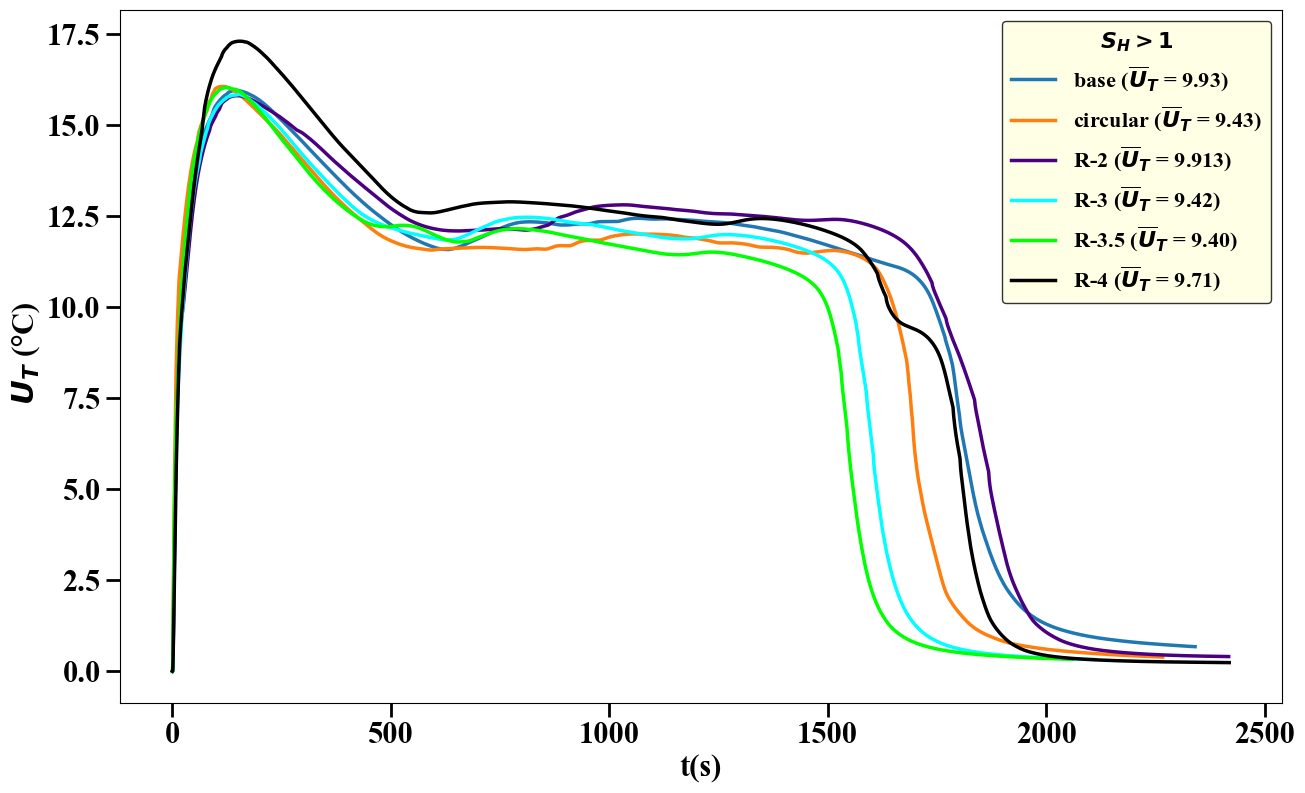

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(15, 9))

# Set global font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'bold'

# Plot the lines for different datasets

sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['temp-uniformity-index'], 
             label=r'base ($\overline{U}_{T}$ = 9.93)',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['temp-uniformity-index'], 
             label=r'circular ($\overline{U}_{T}$ = 9.43)',
             linewidth=2.5)


sns.lineplot(x=my_file10['flow-time'], 
             y=my_file10['temp-uniformity-index'], 
             label=r'R-2 ($\overline{U}_{T}$ = 9.913)',
             linewidth=2.5,
             color='indigo')



sns.lineplot(x=my_file11['flow-time'], 
             y=my_file11['temp-uniformity-index'], 
             label=r'R-3 ($\overline{U}_{T}$ = 9.42)',
             linewidth=2.5,
             color='aqua')

sns.lineplot(x=my_file12['flow-time'], 
             y=my_file12['temp-uniformity-index'], 
             label=r'R-3.5 ($\overline{U}_{T}$ = 9.40)',
             linewidth=2.5,
             color='lime')

sns.lineplot(x=my_file13['flow-time'], 
             y=my_file13['temp-uniformity-index'], 
             label=r'R-4 ($\overline{U}_{T}$ = 9.71)',
             linewidth=2.5,
             color='black')

# Set x-axis to logarithmic scale


# Customize the background color
plt.tick_params(length=10, width=2)

# Add title and labels

plt.xlabel('t(s)', fontweight='bold')
plt.ylabel(r' $U_{T}$ (°C)', fontweight='bold')

# Customize the legend with LaTeX formatting for subscript and ≤
plt.legend(title=r'$S_{H} > 1$', fontsize=16, title_fontsize= 16,facecolor='lightyellow', frameon=True, edgecolor='black')
plt.savefig('temp-runiformity-index-2.png', dpi=400, bbox_inches='tight')
# Show the plot
plt.show()


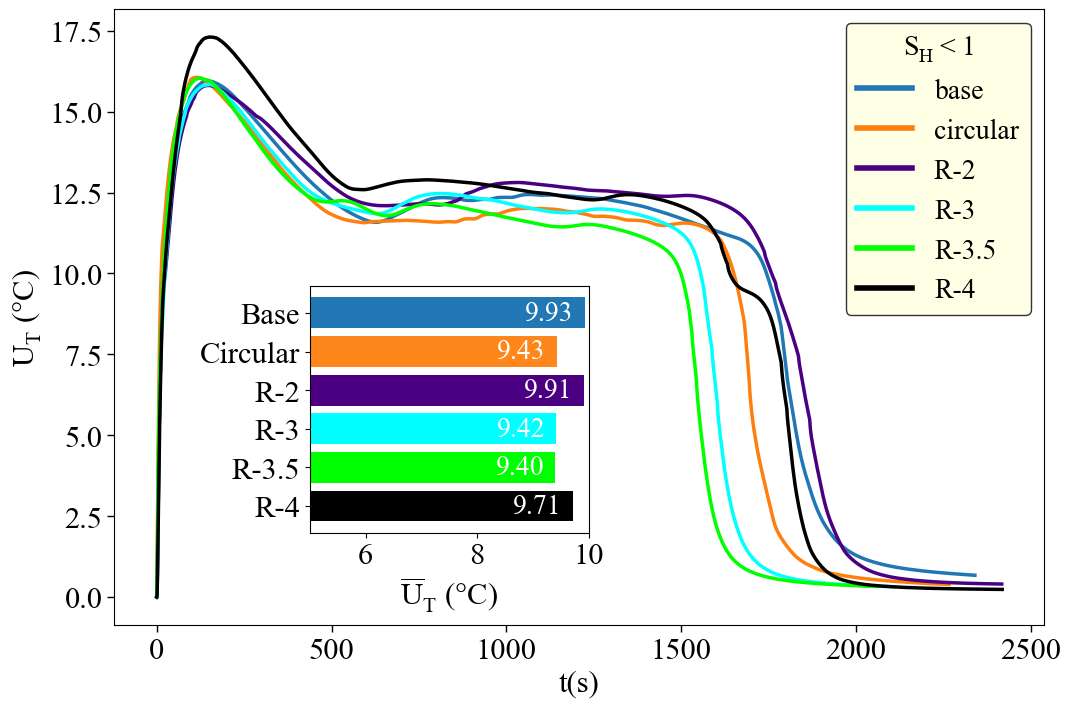

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(12,8))

# Set global font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'
ax = plt.gca()
# Plot the lines for different datasets
sns.lineplot(x=my_file2['flow-time'], 
             y=my_file2['temp-uniformity-index'], 
             label=r'base',
             linewidth=2.5)

sns.lineplot(x=my_file4['flow-time'], 
             y=my_file4['temp-uniformity-index'], 
             label=r'circular',
             linewidth=2.5)

sns.lineplot(x=my_file10['flow-time'], 
             y=my_file10['temp-uniformity-index'], 
             label=r'R-2 ',
             linewidth=2.5,
             color='indigo')

sns.lineplot(x=my_file11['flow-time'], 
             y=my_file11['temp-uniformity-index'], 
             label=r'R-3',
             linewidth=2.5,
             color='aqua')

sns.lineplot(x=my_file12['flow-time'], 
             y=my_file12['temp-uniformity-index'], 
             label=r'R-3.5',
             linewidth=2.5,
             color='lime')

sns.lineplot(x=my_file13['flow-time'], 
             y=my_file13['temp-uniformity-index'], 
             label=r'R-4',
             linewidth=2.5,
             color='black')



# Customize tick labels
ax.tick_params(length=10, width=2, labelsize=22)

# Add title and labels
ax.set_xlabel('t(s)')
ax.set_ylabel(r'$\mathregular{U_{T}}$ (°C)')

# Get the figure and main axes positions
fig = plt.gcf()
rect = ax.get_position()

# Define the position and size of the inset axes relative to the main axes
inset_left = rect.x0 + 0.21 * rect.width
inset_bottom = rect.y0 + 0.15 * rect.height
inset_width = 0.3 * rect.width
inset_height = 0.4 * rect.height

# Create inset axes
ax_inset = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

# Data for the inset horizontal bar plot
datasets = ['R-4', 'R-3.5', 'R-3', 'R-2', 'Circular', 'Base']
ut_values = [9.71, 9.40, 9.42, 9.913, 9.43, 9.93]

# Plot horizontal bar plot for Ut values
bars = ax_inset.barh(datasets, ut_values, color=['#000000', '#00ff00', '#00ffff', '#4b0082', '#ff861b','#2178b4'])

# Annotate each bar with the Ut value
for bar, ut_value in zip(bars, ut_values):
    ax_inset.text(ut_value - 0.2, bar.get_y() + bar.get_height() / 2,
                  f'{ut_value:.2f}',
                  va='center', ha='right', color='white', fontsize=20)

# Set axes properties for the inset
ax_inset.set_xlabel(r'$\mathregular{\overline{U}_{T}}$ (°C)')

ax_inset.set_xlim(5, 10.0)

# Rotate y-axis labels if necessary
plt.setp(ax_inset.get_yticklabels(), rotation=0)
# Customize tick label sizes for x and y axes
ax.tick_params(axis='x', labelsize=22, length=5, width=1)  # x-axis
ax.tick_params(axis='y', labelsize=22, length=5, width=1)  # y-axis
# Customize the legend with LaTeX formatting
legend = ax.legend(title=r'$\mathregular{S_{H} < 1}$', fontsize=20, facecolor='lightyellow', 
                   frameon=True, edgecolor='black', title_fontsize=20, loc='upper right')
for line in legend.get_lines():
    line.set_linewidth(4)

# Save and show the plot
plt.savefig('temp-uniformity1.png', dpi=400, bbox_inches='tight')
plt.show()


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import FuncFormatter, LogLocator
from PIL import Image


img = Image.open('temp-uniformity2.png')
img.save('temp-uniformity-index-2.bmp', format='bmp')

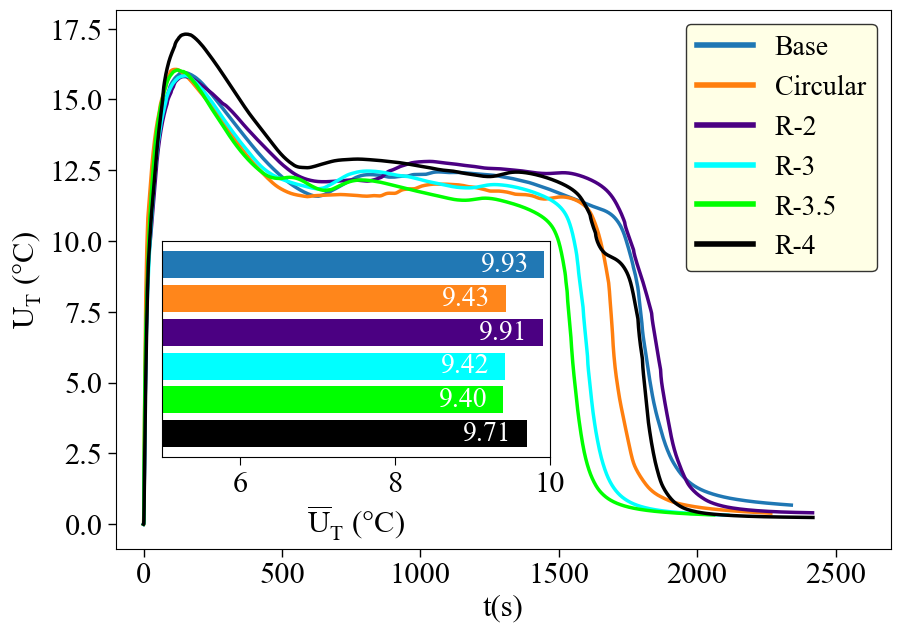

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn figure with custom size
plt.figure(figsize=(10,7))

# Set global font properties
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 22
plt.rcParams['font.weight'] = 'normal'
ax = plt.gca()

# Plot the lines for different datasets
base_line = sns.lineplot(x=my_file2['flow-time'], 
                         y=my_file2['temp-uniformity-index'], 
                         label=r'Base',
                         linewidth=2.5)

circular_line = sns.lineplot(x=my_file4['flow-time'], 
                              y=my_file4['temp-uniformity-index'], 
                              label=r'Circular',
                              linewidth=2.5)

r2_line = sns.lineplot(x=my_file10['flow-time'], 
                       y=my_file10['temp-uniformity-index'], 
                       label=r'R-2 ',
                       linewidth=2.5,
                       color='indigo')

r3_line = sns.lineplot(x=my_file11['flow-time'], 
                       y=my_file11['temp-uniformity-index'], 
                       label=r'R-3',
                       linewidth=2.5,
                       color='aqua')

r35_line = sns.lineplot(x=my_file12['flow-time'], 
                        y=my_file12['temp-uniformity-index'], 
                        label=r'R-3.5',
                        linewidth=2.5,
                        color='lime')

r4_line = sns.lineplot(x=my_file13['flow-time'], 
                       y=my_file13['temp-uniformity-index'], 
                       label=r'R-4',
                       linewidth=2.5,
                       color='black')

# Customize tick labels
ax.tick_params(length=10, width=2, labelsize=22)

# Add title and labels
ax.set_xlabel('t(s)')
ax.set_ylabel(r'$\mathregular{U_{T}}$ (°C)')
ax.set_xlim(-100, 2700)

legend = ax.legend(title='', fontsize=20, facecolor='lightyellow', 
                   frameon=True, edgecolor='black', title_fontsize=18, loc='upper right')
for line in legend.get_lines():
    line.set_linewidth(4)

# Get the figure and main axes positions
fig = plt.gcf()
rect = ax.get_position()

# Define the position and size of the inset axes relative to the main axes
inset_left = rect.x0 + 0.06 * rect.width
inset_bottom = rect.y0 + 0.17 * rect.height
inset_width = 0.5 * rect.width
inset_height = 0.4 * rect.height

# Create inset axes
ax_inset = fig.add_axes([inset_left, inset_bottom, inset_width, inset_height])

# Data for the inset horizontal bar plot
datasets = ['R-4', 'R-3.5', 'R-3', 'R-2', 'Circular', 'Base']
ut_values = [9.71, 9.40, 9.42, 9.913, 9.43, 9.93]

# Plot horizontal bar plot for Ut values
bars = ax_inset.barh(datasets, ut_values, color=['#000000', '#00ff00', '#00ffff', '#4b0082', '#ff861b', '#2178b4'])

# Annotate each bar with the Ut value
for bar, ut_value in zip(bars, ut_values):
    ax_inset.text(ut_value - 0.2, bar.get_y() + bar.get_height() / 2,
                  f'{ut_value:.2f}',
                  va='center', ha='right', color='white', fontsize=20)

# Set axes properties for the inset
ax_inset.set_xlabel(r'$\mathregular{\overline{U}_{T}}$ (°C)')
ax.tick_params(axis='x', labelsize=22, length=6, width=1)  # x-axis
ax.tick_params(axis='y', labelsize=22, length=6, width=1)
# Customize the legend with LaTeX formatting
ax_inset.set_xlim(5, 10.0)
ax_inset.set_yticklabels([])
ax_inset.tick_params(axis='y', length=0)
ax_inset.tick_params(axis='x', length=6)
# Rotate y-axis labels if necessary
plt.setp(ax_inset.get_yticklabels(), rotation=0)

# Save and show the plot
plt.savefig('temp-uniformity2.png', dpi=400, bbox_inches='tight')
plt.show()
